# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis. f

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
import warnings

warnings.filterwarnings("ignore")

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("./Train")
data_dir_test = pathlib.Path("./Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [21]:
batch_size = 32
img_height = 180
img_width = 180
input_shape = (img_height,img_width,3)

Use 80% of the images for training, and 20% for validation.

In [22]:
# Train and validation dataset
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    label_mode='categorical',                                                
    seed=123,
    subset="both",
    validation_split=0.2
)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(123).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.


In [23]:
# List out all the classes of skin cancer and store them in a list. 
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

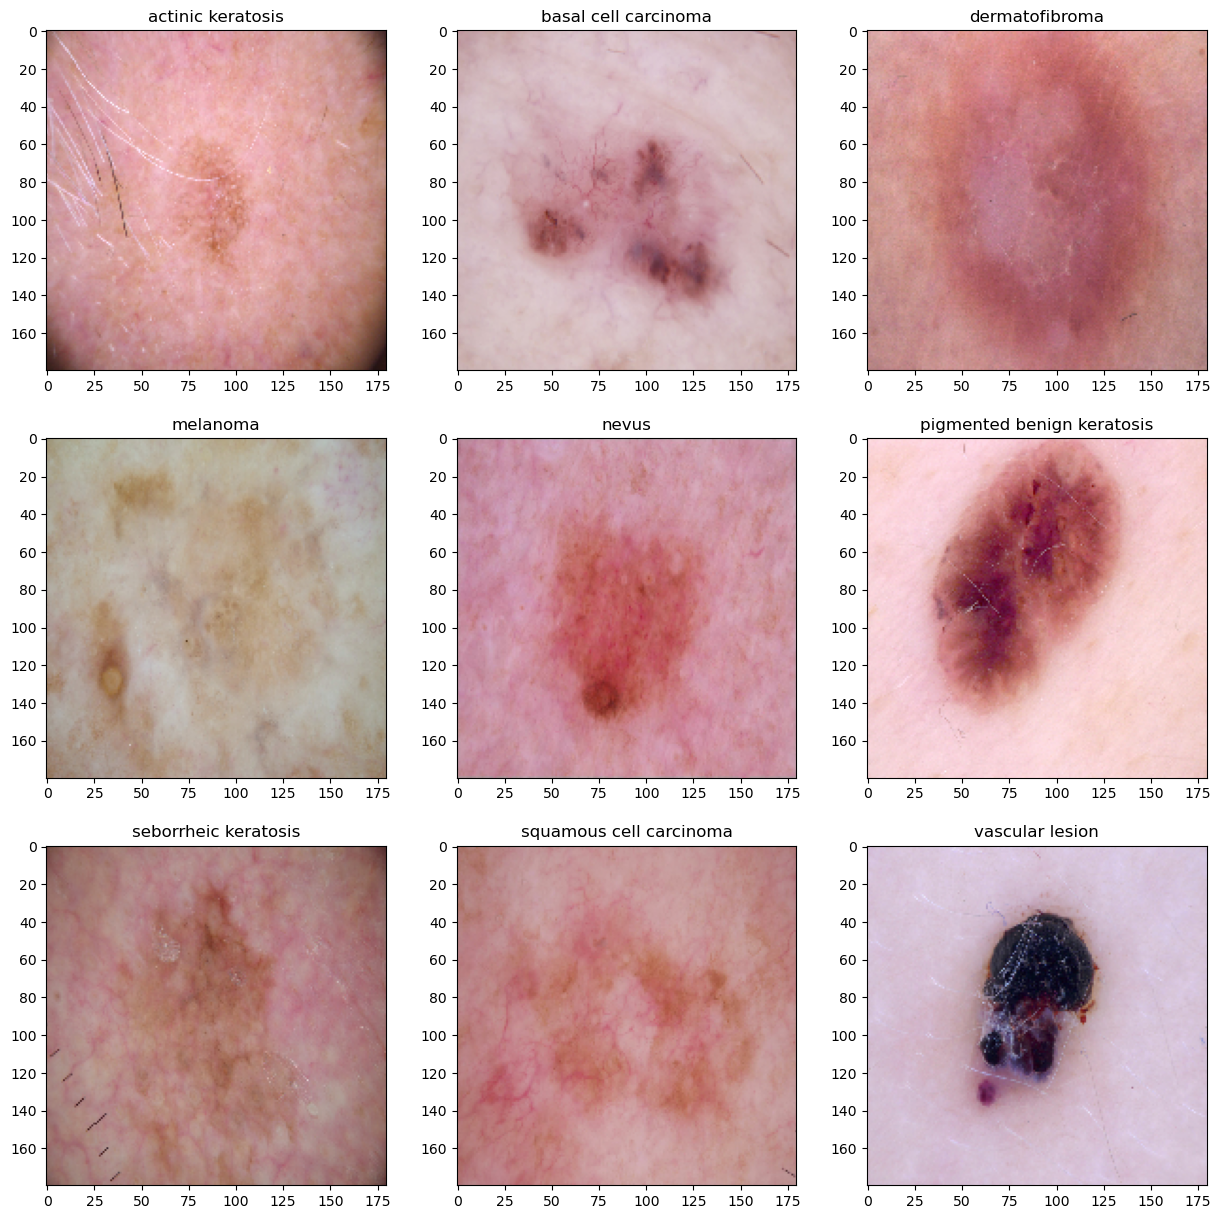

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    index += 1
    path = str(data_dir_train)+'/'+c+'/' + os.listdir(str(data_dir_train)+'/'+c)[0]
    plt.subplot(3,3,index)
    plt.imshow(load_img(path,target_size=(img_height,img_width)))
    plt.title(c)

### Create the model

In [25]:
input_shape = (img_height,img_width,3)

# sequential model
model = Sequential() 

# Input layer to rescale an input to be in the [0, 1] range  
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))

# 1st Convulation Layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 2nd Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 3rd Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 4th Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten into single dimension
model.add(layers.Flatten()) 

# 1st Dense Layer
model.add(layers.Dense(1024,activation='relu'))

# 2nd Dense Layer
model.add(layers.Dense(128,activation='relu'))

# Output Dense Layer with softmax activation function to classify into 9 classes.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [26]:
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 41, 64)       

### Train the model

In [27]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2023-01-25 12:15:10.101457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


55/56 [============================>.] - ETA: 0s - loss: 1.9423 - accuracy: 0.2619

2023-01-25 12:15:14.756533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


56/56 [==============================] - 6s 42ms/step - loss: 1.9415 - accuracy: 0.2634 - val_loss: 1.7140 - val_accuracy: 0.4251
Epoch 2/20
56/56 [==============================] - 1s 27ms/step - loss: 1.6914 - accuracy: 0.3700 - val_loss: 1.5533 - val_accuracy: 0.4497
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5012 - accuracy: 0.4598 - val_loss: 1.4431 - val_accuracy: 0.5056
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4069 - accuracy: 0.4916 - val_loss: 1.4423 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3599 - accuracy: 0.5206 - val_loss: 1.3884 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.3080 - accuracy: 0.5279 - val_loss: 1.4467 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2715 - accuracy: 0.5519 - val_loss: 1.4095 - val_accuracy: 0.5302
Epoch 8/20
56/56 [======

### Visualizing training results

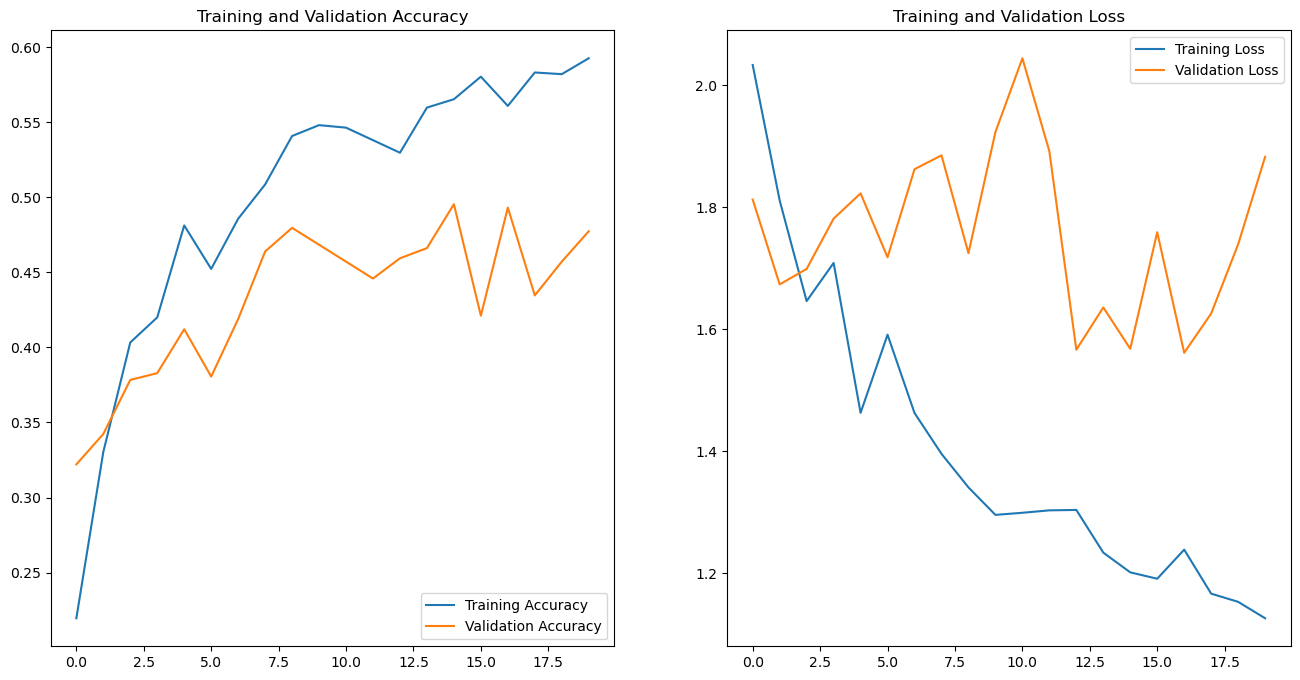

In [48]:
def show_training_results(history, epochs):
    acc = history['categorical_accuracy']
    val_acc = history['val_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

show_training_results(history.history, epochs)

### Findings from the first model

While the training accuracy of 0.79 after 20 epochs is a good result but a much lower validation accuracy of 0.55 clearly indicates the case of overfitting.

### Augumenting Data

In [39]:
#Data augumentation strategy. 

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        zoom_range = 0.2,
        rotation_range = 10,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2,
        rescale=1./255
)  

# Train and validation dataset
train_ds = datagen.flow_from_directory(
    data_dir_train,
    batch_size=batch_size,
    target_size=(img_height,img_width),
    class_mode='categorical',                                                
    seed=123,
    subset="training"
)

val_ds = datagen.flow_from_directory(
    data_dir_train,
    batch_size=batch_size,
    target_size=(img_height,img_width),
    class_mode='categorical',                                                
    seed=123,
    subset="validation"
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


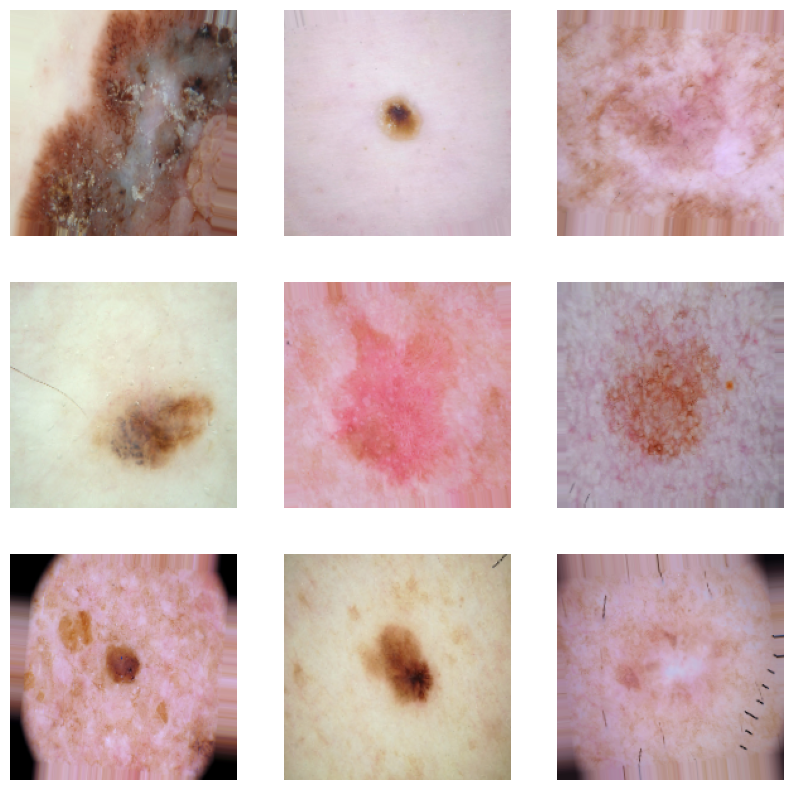

In [40]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
train_ds.reset()
images, _ = train_ds.next()
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
train_ds.reset()

### Create the model, compile and train the model


In [44]:
## Model 2 Creation
model = Sequential() 

# 1st Convulation Layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu', input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 2nd Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 3rd Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 4th Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten into single dimension
model.add(layers.Flatten()) 

# 1st Dense Layer
model.add(layers.Dense(1024,activation='relu'))

# 2nd Dense Layer
model.add(layers.Dense(128,activation='relu'))

# Output Dense Layer with softmax activation function to classify into 9 classes.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the model

In [45]:
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=["categorical_accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 20, 20, 64)      

### Training the model

In [46]:
epochs =20
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)


Epoch 1/20


2023-01-25 12:33:30.828097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 2.0331 - categorical_accuracy: 0.2195

2023-01-25 12:33:49.550627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 24s 420ms/step - loss: 2.0331 - categorical_accuracy: 0.2195 - val_loss: 1.8124 - val_categorical_accuracy: 0.3221
Epoch 2/20
57/57 [==============================] - 25s 442ms/step - loss: 1.8109 - categorical_accuracy: 0.3304 - val_loss: 1.6732 - val_categorical_accuracy: 0.3423
Epoch 3/20
57/57 [==============================] - 26s 450ms/step - loss: 1.6459 - categorical_accuracy: 0.4033 - val_loss: 1.6987 - val_categorical_accuracy: 0.3784
Epoch 4/20
57/57 [==============================] - 26s 451ms/step - loss: 1.7085 - categorical_accuracy: 0.4201 - val_loss: 1.7812 - val_categorical_accuracy: 0.3829
Epoch 5/20
57/57 [==============================] - 26s 452ms/step - loss: 1.4626 - categorical_accuracy: 0.4813 - val_loss: 1.8226 - val_categorical_accuracy: 0.4122
Epoch 6/20
57/57 [==============================] - 25s 435ms/step - loss: 1.5908 - categorical_accuracy: 0.4524 - val_loss: 1.7178 - val_categorical_accuracy: 0.3806
Epoch 7/2

### Visualizing the results

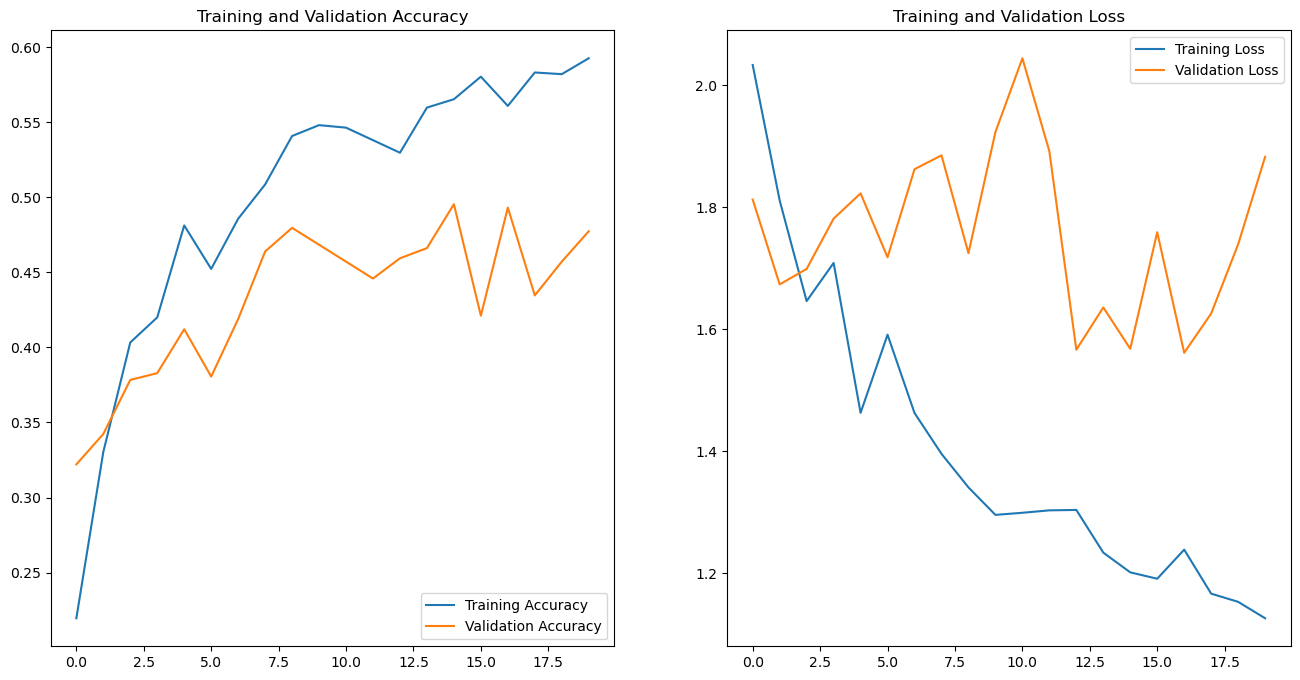

In [49]:
show_training_results(history.history, epochs)

The difference between the accuracy of training and validation set have reduced a lot. Next we will look at class distribution of our training dataset to improve the accuracy further.

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [50]:

def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,melanoma,439
1,pigmented benign keratosis,463
2,nevus,358
3,basal cell carcinoma,377
4,actinic keratosis,115
5,squamous cell carcinoma,182
6,vascular lesion,140
7,seborrheic keratosis,78
8,dermatofibroma,96


#### - Which class has the least number of samples?
seborrheic keratosis and dermatofibroma
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis and melanoma

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [51]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [72]:
import Augmentor
import shutil

path_to_training_dataset="./Train/"
path_to_output_dataset="../../TrainAugmented/"
if os.path.exists('./TrainAugmented'):
    shutil.rmtree('./TrainAugmented')
os.mkdir('./TrainAugmented')

# add 500 augmented samples for each category to a new folder
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory = path_to_output_dataset + i)
    p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.7)
    p.flip_top_bottom(probability=0.7)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.2)
    #p.skew(probability=0.5)
    p.sample(1500) ## We are adding 1500 samples per class to make sure that none of the classes are sparse.b

Initialised with 114 image(s) found.
Output directory set to ./Train/actinic keratosis/../../TrainAugmented/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2E38C7940>: 100%|█████████████████████████████| 1500/1500 [00:06<00:00, 246.70 Samples/s]


Initialised with 376 image(s) found.
Output directory set to ./Train/basal cell carcinoma/../../TrainAugmented/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2E4528A60>: 100%|█████████████████████████████| 1500/1500 [00:06<00:00, 241.82 Samples/s]


Initialised with 95 image(s) found.
Output directory set to ./Train/dermatofibroma/../../TrainAugmented/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2E392F340>: 100%|█████████████████████████████| 1500/1500 [00:06<00:00, 242.14 Samples/s]


Initialised with 438 image(s) found.
Output directory set to ./Train/melanoma/../../TrainAugmented/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2C9159B10>: 100%|█████████████████████████████| 1500/1500 [00:22<00:00, 66.13 Samples/s]


Initialised with 357 image(s) found.
Output directory set to ./Train/nevus/../../TrainAugmented/nevus.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2D5CDE560>: 100%|██████████████████████████████| 1500/1500 [00:20<00:00, 72.34 Samples/s]


Initialised with 462 image(s) found.
Output directory set to ./Train/pigmented benign keratosis/../../TrainAugmented/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2C9112650>: 100%|█████████████████████████████| 1500/1500 [00:06<00:00, 233.63 Samples/s]


Initialised with 77 image(s) found.
Output directory set to ./Train/seborrheic keratosis/../../TrainAugmented/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2D61A5750>: 100%|████████████████████████████| 1500/1500 [00:13<00:00, 111.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to ./Train/squamous cell carcinoma/../../TrainAugmented/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2DA1B9150>: 100%|█████████████████████████████| 1500/1500 [00:05<00:00, 296.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to ./Train/vascular lesion/../../TrainAugmented/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2E3894BE0>: 100%|█████████████████████████████| 1500/1500 [00:05<00:00, 256.23 Samples/s]


In [73]:
from glob import glob

# copy old samples to the new folder
for c in class_names:
    for p in glob('./Train/' + c + '/*.jpg'):
        shutil.copy(p, "./TrainAugmented/"+c)

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [74]:

image_count_train = len(list(glob('./TrainAugmented/**/*.jpg')))
print(image_count_train)

15739


### Lets see the distribution of augmented data after adding new images to the original training data.

In [75]:
path_list = [x for x in glob('./TrainAugmented/**/*.jpg')]
path_list

['./TrainAugmented/melanoma/ISIC_0010550.jpg',
 './TrainAugmented/melanoma/ISIC_0011128.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0000285.jpg_b88d3a1c-61f0-4295-8385-78ec99152c22.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0010235.jpg_e8a1165f-a2dc-4319-b901-e039a459fbc6.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0010749.jpg_4a9a67b5-a381-415f-8636-f80b154b1a68.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0010766.jpg_b641103a-9575-4f66-b044-dd3e2ddb3255.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0010579.jpg_7f309942-4c47-4425-8146-740e1ee2f0e7.jpg',
 './TrainAugmented/melanoma/ISIC_0010587.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0000143.jpg_b1a41fa1-7d01-4992-ae83-285e82872013.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0009971.jpg_5374cc3d-c89e-4d69-8dd1-984bd596d225.jpg',
 './TrainAugmented/melanoma/melanoma_original_ISIC_0010388.jpg_0b67a131-aabb-4dc7-bd64-411dbc4adb78.jpg',
 './TrainAu

In [76]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob('./TrainAugmented/**/*.jpg')]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [77]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [78]:
#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [79]:
df2['Label'].value_counts()

pigmented benign keratosis    1962
melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
squamous cell carcinoma       1681
vascular lesion               1639
actinic keratosis             1614
dermatofibroma                1595
seborrheic keratosis          1577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

####  Train the model on the data created using Augmentor

In [80]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training and a validation dataset

In [95]:
#Data augumentation strategy. 
data_dir_train = pathlib.Path("./TrainAugmented/")

# Train and validation dataset
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    label_mode='categorical',                                                
    seed=123,
    subset="both",
    validation_split=0.2
)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(123).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.
Using 3147 files for validation.


#### Create your model

In [96]:
## Model 3 Creation
model = Sequential() 

# Input layer to rescale an input to be in the [0, 1] range  
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))

# 1st Convulation Layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 2nd Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 3rd Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 4th Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten into single dimension
model.add(layers.Flatten()) 

# 1st Dense Layer
model.add(layers.Dense(1024,activation='relu'))

# 2nd Dense Layer
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output Dense Layer with softmax activation function to classify into 9 classes.
model.add(layers.Dense(len(class_names),activation='softmax'))

#### Compile your model 

In [97]:
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 41, 41, 64)      

#### Train your model

In [98]:
epochs = 30
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/30


2023-01-25 13:13:24.099237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


392/394 [============================>.] - ETA: 0s - loss: 1.8109 - categorical_accuracy: 0.2941

2023-01-25 13:13:44.101120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


394/394 [==============================] - 24s 48ms/step - loss: 1.8112 - categorical_accuracy: 0.2942 - val_loss: 1.5720 - val_categorical_accuracy: 0.4096
Epoch 2/30
394/394 [==============================] - 11s 28ms/step - loss: 1.6262 - categorical_accuracy: 0.3625 - val_loss: 1.8689 - val_categorical_accuracy: 0.2933
Epoch 3/30
394/394 [==============================] - 11s 28ms/step - loss: 1.6474 - categorical_accuracy: 0.3477 - val_loss: 1.5080 - val_categorical_accuracy: 0.4055
Epoch 4/30
394/394 [==============================] - 11s 28ms/step - loss: 1.4922 - categorical_accuracy: 0.4107 - val_loss: 1.4858 - val_categorical_accuracy: 0.4039
Epoch 5/30
394/394 [==============================] - 11s 28ms/step - loss: 1.4465 - categorical_accuracy: 0.4382 - val_loss: 1.4488 - val_categorical_accuracy: 0.4214
Epoch 6/30
394/394 [==============================] - 11s 28ms/step - loss: 1.3784 - categorical_accuracy: 0.4620 - val_loss: 1.4764 - val_categorical_accuracy: 0.4306
Epo

#### Visualize the model results

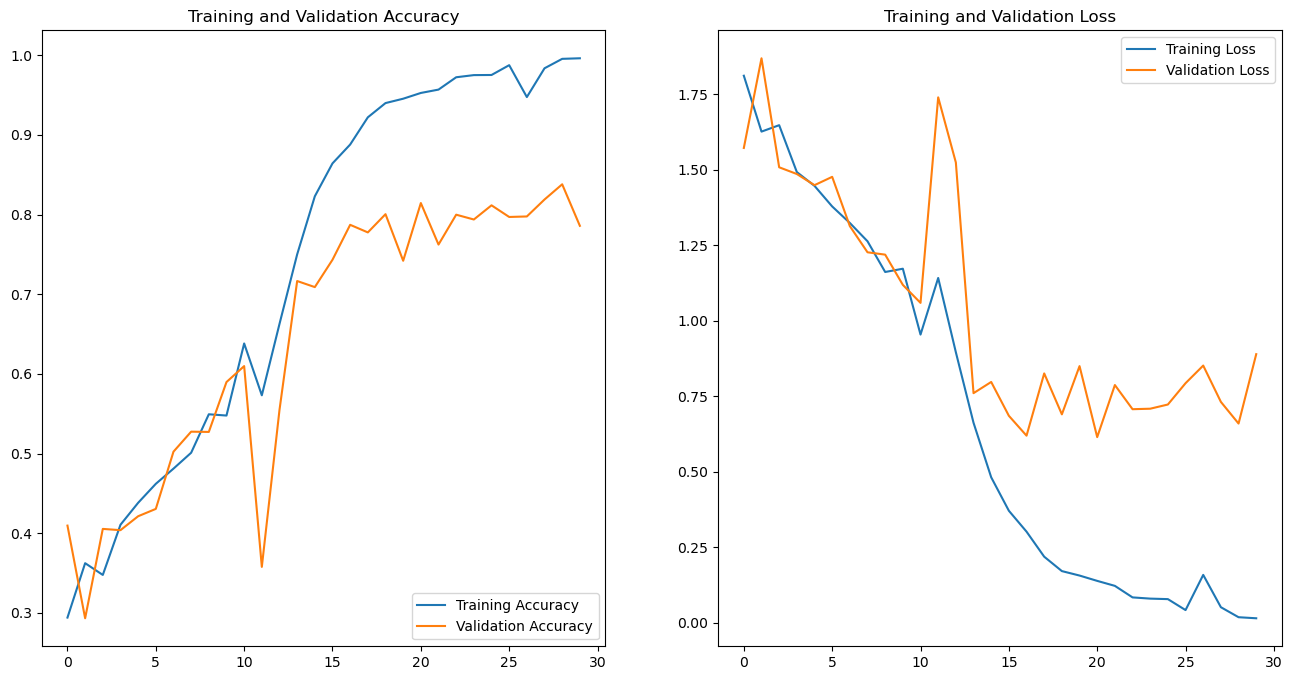

In [99]:
show_training_results(history.history, epochs)

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The class rebalance along with augmentation seems to help with overall accuracy and overfitting.